In [1]:
%reload_ext autotime
import requests
import requests_cache
requests_cache.install_cache('cache')
import requests_html
import math
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
from pprint import pprint
import re
import traceback
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_colwidth", None)
existing_df = pd.read_excel("givealittle_health.xlsx")
existing_df = existing_df[existing_df.timeLeft == "closed"]
existing_df

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,Q&A
14,💛 Help Me Fulfil a Dying Wish – One Last Famil...,Helping fulfil a mum’s dying wish to see Queen...,https://static.givealittle.co.nz/assets/hero/7...,https://givealittle.co.nz/cause/help-me-fulfil...,100.0,0.0,closed,Read more,https://givealittle.co.nz/cause/help-me-fulfil...,4 Jun 2025,11 Jun 2025,0,Auckland,4.0,My family member has just been diagnosed with ...,All going towards trip costs,"Created by, and paying to a verified bank acco...",Page Moderated,NaN,NaN,NaN
31,Helping a person in need,Helping out a person in need that would drop h...,https://static.givealittle.co.nz/assets/hero/e...,https://givealittle.co.nz/cause/helping-a-pers...,1700.0,2000.0,closed,Read more,https://givealittle.co.nz/cause/helping-a-pers...,29 May 2025,8 Jun 2025,0,"Blenheim, Marlborough",54.0,Tok had a serious injury while running — he to...,medical care where needed and general stuff ar...,"Created by, and paying to a verified bank acco...",Page Moderated,3.0,Big thanks\n7 June 2025\nHey team huge thanks ...,NaN
56,Please help Walter 🙏 to get the veterinary car...,Please help us 🙏 Walty needs bloodwork to rule...,https://static.givealittle.co.nz/assets/hero/a...,https://givealittle.co.nz/cause/please-help-wa...,380.0,500.0,closed,Read more,https://givealittle.co.nz/cause/please-help-wa...,22 May 2025,1 Jun 2025,0,Otago,14.0,"Walter has been my life for 15 years, since he...",The money raised will go into Walts vet costsF...,"Created by, and paying to a verified bank acco...",Page Moderated,1.0,Bloodwork done.\n23 May 2025\nThank you so muc...,NaN
59,Medical Treatment for Atish Lal for Coronary A...,medical Treatment,https://static.givealittle.co.nz/assets/hero/0...,https://givealittle.co.nz/cause/medical-treatm...,380.0,14900.0,closed,Read more,https://givealittle.co.nz/cause/medical-treatm...,20 May 2025,6 Jun 2025,0,Auckland,6.0,"Dear Family and Friends,\nI hope this message ...",Estimated costs for Treatment & Travel:- PTCA ...,Created by\r\nShaneel Prasad \n\n\n\n\r\n ...,Page Moderated,NaN,NaN,NaN
72,Shaved white head for cancer!,Shaving my white pastey head for cancer!,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/shaved-white-h...,405.0,0.0,closed,Read more,https://givealittle.co.nz/cause/shaved-white-h...,18 May 2025,25 May 2025,0,Canterbury,13.0,After an extremely successful Powerfarming Can...,This money will be for the Cancer Society to s...,Created by\r\nJimmy Leigh \n\n\n\n\r\n P...,Page Moderated,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11208,Amber and Daniel were twins born on 24th and 2...,Raising money for the little McSweeney family ...,https://static.givealittle.co.nz/assets/hero/a...,https://givealittle.co.nz/cause/hartleytwinsmi...,4834.0,0.0,closed,Read more,https://givealittle.co.nz/cause/hartleytwinsmi...,2 May 2016,6 Jun 2016,0,Canterbury,122.0,PLEASE READ THE UPDATE TO THIS POST UNDER UPDA...,NaN,"Created by, and paying to a verified bank acco...",Page Moderated,1.0,Attention all followers of our story\n31 May 2...,NaN
11209,"Tania Whanau, known by most as Tarnz, is a str...",Since February '16 Tarnz has undergone two ope...,https://static.givealittle.co.nz/assets/hero/6...,https://givealittle.co.nz/cause/fightbreastcan...,1550.0,0.0,closed,Read more,https://givealittle.co.nz/cause/fightbreastcan...,1 May 2016,22 Jul 2016,0,Hawke's Bay,34.0,"Tania Whanau, known by most as Tarnz, is a str...",NaN,Created by_x000D_\n _x000D_\n Nanc...,Page Moderated,NaN,NaN,NaN
11210,Cardiology Fundraiser,Fundraising for patients & families affected b...,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/fund4aheart,915.0,0.0,closed,Read more,https://givealittle.co.nz/cause/fund4aheart,1 May 2016,15 Aug 2016,0,Waikato,9.0,We aim to prov

time: 4.79 s (started: 2025-10-28 15:51:19 +13:00)


In [2]:
# takes about 7m without cache.sqlite
URL = "https://givealittle.co.nz/search/api?category=health&showClosed=True&page=cause&sort=newest"
first = requests.get(URL).json()
total = first["total"]
results = first["results"]
last_page = math.ceil(total / len(results))
print(f"Last page: {last_page}")
last_page = min(last_page, 1000)
for page in tqdm(range(2, last_page + 1)):
    try:
        url = f"{URL}&p={page}"
        page_results = requests.get(url).json()
    except Exception as e:
        print(f"Error on page {page}: {e}")
        traceback.print_exc()
        continue
    results.extend(page_results["results"])

Last page: 1365


  0%|          | 0/999 [00:00<?, ?it/s]

time: 9min 29s (started: 2025-10-28 15:51:28 +13:00)


In [3]:
df = pd.DataFrame(results)
df.uri = "https://givealittle.co.nz" + df.uri
df.actionUri = "https://givealittle.co.nz" + df.actionUri
df

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri
0,Support Emma’s Family as They Cherish Every Mo...,Supporting Emma and Her Family Through Stage 4...,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/supportforemma,9920.0,15000.0,89 days to go,Donate,https://givealittle.co.nz/donate/cause/support...
1,Southland Farm Family Facing Breast Cancer,Help ease Tammy and Trent's financial pressure...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/southland-farm...,3730.0,0.0,178 days to go,Donate,https://givealittle.co.nz/donate/cause/southla...
2,Please support Cody and his Mum Mel on their c...,Please support Cody and his Mum Mel on their c...,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/please-support...,4453.0,0.0,488 days to go,Donate,https://givealittle.co.nz/donate/cause/please-...
3,"“Together for Thomas — Backing a Father, Frien...",This Givealittle page is a heartfelt tribute t...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/together-for-t...,845.0,10000.0,88 days to go,Donate,https://givealittle.co.nz/donate/cause/togethe...
4,Broken but not out yet,Hate asking for help,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/broken-but-not...,15.0,8000.0,343 days to go,Donate,https://givealittle.co.nz/donate/cause/broken-...
...,...,...,...,...,...,...,...,...,...
9994,Please help me get a Medical bed - THANK YOU -...,Single mother of 2 with Wegener’s granulomatos...,https://static.givealittle.co.nz/assets/hero/6...,https://givealittle.co.nz/cause/medicalbed,7152.0,6400.0,closed,Read more,https://givealittle.co.nz/cause/medicalbed
9995,Melissa's YWAM Medical DTS,Help Melissa fund the outreach phase of her Me...,https://static.givealittle.co.nz/assets/hero/4...,https://givealittle.co.nz/cause/melissasmedica...,245.0,0.0,closed,Read more,https://givealittle.co.nz/cause/melissasmedica...
9996,Donna urgently needs our help to fund her last...,Donna has beaten cancer but is now fighting a ...,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/help4donnacliff,1500.0,0.0,closed,Read more,https://givealittle.co.nz/cause/help4donnacliff
9997,Tamai Howe's Assistance Dog,To help us achieve our goal of purchasing an A...,https://static.givealittle.co.nz/assets/hero/a...,https://givealittle.co.nz/cause/tamaisdog,4625.0,20000.0,closed,Read more,https://givealittle.co.nz/cause/tamaisdog


time: 78.7 ms (started: 2025-10-28 16:00:58 +13:00)


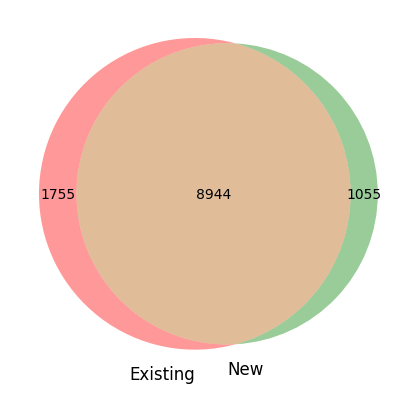

time: 1.48 s (started: 2025-10-28 16:00:58 +13:00)


In [4]:
from matplotlib_venn import venn2
venn2([set(existing_df.uri), set(df.uri)], set_labels=["Existing", "New"])

In [5]:
df = df[~df.uri.isin(existing_df.uri)]
df

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri
0,Support Emma’s Family as They Cherish Every Mo...,Supporting Emma and Her Family Through Stage 4...,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/supportforemma,9920.00,15000.0,89 days to go,Donate,https://givealittle.co.nz/donate/cause/support...
1,Southland Farm Family Facing Breast Cancer,Help ease Tammy and Trent's financial pressure...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/southland-farm...,3730.00,0.0,178 days to go,Donate,https://givealittle.co.nz/donate/cause/southla...
2,Please support Cody and his Mum Mel on their c...,Please support Cody and his Mum Mel on their c...,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/please-support...,4453.00,0.0,488 days to go,Donate,https://givealittle.co.nz/donate/cause/please-...
3,"“Together for Thomas — Backing a Father, Frien...",This Givealittle page is a heartfelt tribute t...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/together-for-t...,845.00,10000.0,88 days to go,Donate,https://givealittle.co.nz/donate/cause/togethe...
4,Broken but not out yet,Hate asking for help,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/broken-but-not...,15.00,8000.0,343 days to go,Donate,https://givealittle.co.nz/donate/cause/broken-...
...,...,...,...,...,...,...,...,...,...
2994,Help Mark's Family.,Helping Mark's family during this difficult time.,https://static.givealittle.co.nz/assets/hero/9...,https://givealittle.co.nz/cause/help-marks-family,4086.00,0.0,closed,Read more,https://givealittle.co.nz/cause/help-marks-family
3435,Young Mum diagnosed with stage 4 Melanoma Cancer,Kendall's Melanoma Battle - Fighting for her f...,https://static.givealittle.co.nz/assets/hero/f...,https://givealittle.co.nz/cause/young-mum-diag...,36086.44,0.0,43 days to go,Donate,https://givealittle.co.nz/donate/cause/young-m...
3684,Lachie Love needs your help!,Lachie has an extremely rare and aggressive br...,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/lachie-needs-y...,133161.99,0.0,closed,Read more,https://givealittle.co.nz/cause/lachie-needs-y...
3685,Support for Will on his Cancer Journey,Please help this very deserving family by dona...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/support-for-wi...,126681.01,300000.0,8 days to go,Donate,https://givealittle.co.nz/donate/cause/support...


time: 13.4 ms (started: 2025-10-28 16:00:59 +13:00)


In [6]:
sum(df.timeLeft == "closed")

505

time: 3.5 ms (started: 2025-10-28 16:01:00 +13:00)


In [7]:
s = requests_html.HTMLSession()

time: 642 μs (started: 2025-10-28 16:01:00 +13:00)


In [8]:
def extract(row):
    uri = row.uri
    try:
        row = row.to_dict()
        html = s.get(uri).html
        if "This campaign started on" not in html.text:
            start = ""
            end = ""
        else:
            start, end = re.search(r"This campaign started on (.*) and (?:ends|ended) on (.*)\.", html.text).groups()
        question_link = html.find("a[href$=questions]", first=True)
        if question_link.text.strip() in ["Ask a question here", "Ask one here"]:
            n_questions = 0
        elif "One question has been asked already" in html.text:
            n_questions = 1
        else:
            n_questions = int(re.search("(\d+) questions have been asked already", html.text).group(1))
        use_of_funds = html.find("h4", containing="Use of funds", first=True)
        if use_of_funds:
            use_of_funds = use_of_funds.element.getnext().text_content()
        else:
            use_of_funds = ""
        whos_involved = html.find("h4", containing="Who's involved?", first=True)
        if whos_involved:
            whos_involved = whos_involved.element.getnext().text_content().strip()
        else:
            whos_involved = ""
        location = html.find("body > div > div > div.text-gray-600.pb-8.md\:pt-6 > div.w-full.max-w-6xl.mx-auto.px-6.space-y-2 > div.flex.pt-2.md\:pt-0 > div.w-full.md\:w-7\/12.lg\:w-2\/3.md\:shrink-0.space-y-6.divide-y.divide-gray-200 > div:nth-child(1) > p.mt-4", first=True)
        if location:
            location = location.text
        else:
            location = ""
        n_donors = html.find("body > div > div > div.text-gray-600.pb-8.md\:pt-6 > div.w-full.max-w-6xl.mx-auto.px-6.space-y-2 > div.flex.pt-2.md\:pt-0 > div.flex.flex-grow > div > div > div > div.font-serif > div.pt-1 > div > span", first=True)
        if n_donors:
            n_donors = int(n_donors.text)
        else:
            n_donors = ""
        row.update({
            "start": start,
            "end": end,
            "n_questions": n_questions,
            "location": location,
            "n_donors": n_donors,
            "description": html.find("div.break-words", first=True).text,
            "use_of_funds": use_of_funds,
            "whos_involved": whos_involved,
            "moderated": html.find("div.font-semibold")[-1].text
        })
        if "Latest update" in html.text:
            html = s.get(uri + "/updates").html
            updates = html.find("article")
            row.update({
                "n_updates": len(updates),
                "updates": "\n".join([update.text for update in updates])
            })
        if n_questions:
            html = s.get(uri + "/questions").html
            row["Q&A"] = html.find("body > div > div > div.w-full.max-w-6xl.mx-auto.px-6.py-6.text-gray-600.space-y-4 > div > div > div", first=True).text
        return row
    except Exception as e:
        print(f"{e} when trying to extract {uri}")
        print(traceback.format_exc())

df_extracted = pd.json_normalize(df.progress_apply(extract, axis=1))
df_extracted

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\:'
<>:33: SyntaxWarning: invalid escape sequence '\:'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\:'
<>:33: SyntaxWarning: invalid escape sequence '\:'
/tmp/ipykernel_2174688/276002745.py:17: SyntaxWarning: invalid escape sequence '\d'
  n_questions = int(re.search("(\d+) questions have been asked already", html.text).group(1))
/tmp/ipykernel_2174688/276002745.py:28: SyntaxWarning: invalid escape sequence '\:'
  location = html.find("body > div > div > div.text-gray-600.pb-8.md\:pt-6 > div.w-full.max-w-6xl.mx-auto.px-6.space-y-2 > div.flex.pt-2.md\:pt-0 > div.w-full.md\:w-7\/12.lg\:w-2\/3.md\:shrink-0.space-y-6.divide-y.divide-gray-200 > div:nth-child(1) > p.mt-4", first=True)
/tmp/ipykernel_2174688/276002745.py:33: SyntaxWarning: invalid escape sequence '\:'
  n_donors = html.find("body > div > div > div.text-gray-600.pb-8.md\:pt-6 >

  0%|          | 0/1055 [00:00<?, ?it/s]

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,Q&A
0,Support Emma’s Family as They Cherish Every Mo...,Supporting Emma and Her Family Through Stage 4...,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/supportforemma,9920.00,15000.0,89 days to go,Donate,https://givealittle.co.nz/donate/cause/support...,25 Oct 2025,25 Jan 2026,0,Otago,129,Emma is a loving Mum to 8 year old Sophie and ...,All funds raised will go to Mark to support hi...,Created by\r\nAbbey Cousens \n\n\n\n\r\n ...,Page Moderated,1.0,Thank You\n26 October 2025\nHuge thank you fro...,NaN
1,Southland Farm Family Facing Breast Cancer,Help ease Tammy and Trent's financial pressure...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/southland-farm...,3730.00,0.0,178 days to go,Donate,https://givealittle.co.nz/donate/cause/southla...,24 Oct 2025,24 Apr 2026,0,Southland,18,Tammy and Trent have always been the first to ...,Living expenses while unable to generate incom...,Created by\r\nAdele Cotton \n\n\n\n\r\n ...,Page Moderated,NaN,NaN,NaN
2,Please support Cody and his Mum Mel on their c...,Please support Cody and his Mum Mel on their c...,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/please-support...,4453.00,0.0,488 days to go,Donate,https://givealittle.co.nz/donate/cause/please-...,24 Oct 2025,28 Feb 2027,0,"Riverton, Southland",52,In September 2025 15-year-old Cody Gnys sudden...,All funds raised will go directly towards supp...,Created by\r\nJulie McEwan-Franks \n\n\n\n\r\...,Page Moderated,NaN,NaN,NaN
3,"“Together for Thomas — Backing a Father, Frien...",This Givealittle page is a heartfelt tribute t...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/together-for-t...,845.00,10000.0,88 days to go,Donate,https://givealittle.co.nz/donate/cause/togethe...,24 Oct 2025,24 Jan 2026,0,"Whitianga, Waikato",10,"Our Dad, Thomas, is the kindest soul and the b...",We’re raising funds to help Dad live as fully ...,Created by\r\n \r\n sharni champio...,Page Moderated,NaN,NaN,NaN
4,Broken but not out yet,Hate asking for help,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/broken-but-not...,15.00,8000.0,343 days to go,Donate,https://givealittle.co.nz/donate/cause/broken-...,24 Oct 2025,6 Oct 2026,0,"New Plymouth, Taranaki",3,My story is an interesting one was fit working...,Money will be spent on bills keeping afloat wh...,"Created by, and paying to a verified bank acco...",Page Moderated,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Help Mark's Family.,Helping Mark's family during this difficult time.,https://static.givealittle.co.nz/assets/hero/9...,https://givealittle.co.nz/cause/help-marks-family,4086.00,0.0,closed,Read more,https://givealittle.co.nz/cause/help-marks-family,18 Jul 2023,1 Jul 2025,0,"Johnsonville, Wellington",46,Just after Christmas 2022 Mark was having issu...,Financial help for Mark's family to help ease ...,"Created by, and paying to a verified bank acco...",Page Moderated,1.0,Mark Williams\n12 October 2023\nWith a lot of ...,NaN
1051,Young Mum diagnosed with stage 4 Melanoma Cancer,Kendall's Melanoma Battle - Fighting for her f...,https://static.givealittle.co.nz/assets/hero/f...,https://givealittle.co.nz/cause/young-mum-diag...,36086.44,0.0,43 days to go,Donate,https://givealittle.co.nz/donate/cause/young-m...,19 Mar 2023,10 Dec 2025,1,"Christchurch, Canterbury",220,"My older beautiful sister, Kendall, has been d...",Now that the treatment has become funded any f...,Created by\r\nHolley Gray \n\n\n\n\r\n P...,Page Moderated,27.0,Update as at September 2025\n10 September 2025...,"on 27 Jun 2023\nKylie asks\nHi, my name is Kyl..."
1052,Lachie Love needs your help!,Lachie has an extremely rare and aggressive

time: 7min 9s (started: 2025-10-28 16:01:00 +13:00)


In [9]:
df_extracted = pd.concat([df_extracted, existing_df], ignore_index=True)
df_extracted

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,Q&A
0,Support Emma’s Family as They Cherish Every Mo...,Supporting Emma and Her Family Through Stage 4...,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/supportforemma,9920.0,15000.0,89 days to go,Donate,https://givealittle.co.nz/donate/cause/support...,25 Oct 2025,25 Jan 2026,0,Otago,129,Emma is a loving Mum to 8 year old Sophie and ...,All funds raised will go to Mark to support hi...,Created by\r\nAbbey Cousens \n\n\n\n\r\n ...,Page Moderated,1.0,Thank You\n26 October 2025\nHuge thank you fro...,NaN
1,Southland Farm Family Facing Breast Cancer,Help ease Tammy and Trent's financial pressure...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/southland-farm...,3730.0,0.0,178 days to go,Donate,https://givealittle.co.nz/donate/cause/southla...,24 Oct 2025,24 Apr 2026,0,Southland,18,Tammy and Trent have always been the first to ...,Living expenses while unable to generate incom...,Created by\r\nAdele Cotton \n\n\n\n\r\n ...,Page Moderated,NaN,NaN,NaN
2,Please support Cody and his Mum Mel on their c...,Please support Cody and his Mum Mel on their c...,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/please-support...,4453.0,0.0,488 days to go,Donate,https://givealittle.co.nz/donate/cause/please-...,24 Oct 2025,28 Feb 2027,0,"Riverton, Southland",52,In September 2025 15-year-old Cody Gnys sudden...,All funds raised will go directly towards supp...,Created by\r\nJulie McEwan-Franks \n\n\n\n\r\...,Page Moderated,NaN,NaN,NaN
3,"“Together for Thomas — Backing a Father, Frien...",This Givealittle page is a heartfelt tribute t...,https://static.givealittle.co.nz/assets/hero/c...,https://givealittle.co.nz/cause/together-for-t...,845.0,10000.0,88 days to go,Donate,https://givealittle.co.nz/donate/cause/togethe...,24 Oct 2025,24 Jan 2026,0,"Whitianga, Waikato",10,"Our Dad, Thomas, is the kindest soul and the b...",We’re raising funds to help Dad live as fully ...,Created by\r\n \r\n sharni champio...,Page Moderated,NaN,NaN,NaN
4,Broken but not out yet,Hate asking for help,https://static.givealittle.co.nz/assets/hero/8...,https://givealittle.co.nz/cause/broken-but-not...,15.0,8000.0,343 days to go,Donate,https://givealittle.co.nz/donate/cause/broken-...,24 Oct 2025,6 Oct 2026,0,"New Plymouth, Taranaki",3,My story is an interesting one was fit working...,Money will be spent on bills keeping afloat wh...,"Created by, and paying to a verified bank acco...",Page Moderated,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,Amber and Daniel were twins born on 24th and 2...,Raising money for the little McSweeney family ...,https://static.givealittle.co.nz/assets/hero/a...,https://givealittle.co.nz/cause/hartleytwinsmi...,4834.0,0.0,closed,Read more,https://givealittle.co.nz/cause/hartleytwinsmi...,2 May 2016,6 Jun 2016,0,Canterbury,122.0,PLEASE READ THE UPDATE TO THIS POST UNDER UPDA...,NaN,"Created by, and paying to a verified bank acco...",Page Moderated,1.0,Attention all followers of our story\n31 May 2...,NaN
11750,"Tania Whanau, known by most as Tarnz, is a str...",Since February '16 Tarnz has undergone two ope...,https://static.givealittle.co.nz/assets/hero/6...,https://givealittle.co.nz/cause/fightbreastcan...,1550.0,0.0,closed,Read more,https://givealittle.co.nz/cause/fightbreastcan...,1 May 2016,22 Jul 2016,0,Hawke's Bay,34.0,"Tania Whanau, known by most as Tarnz, is a str...",NaN,Created by_x000D_\n _x000D_\n Nanc...,Page Moderated,NaN,NaN,NaN
11751,Cardiology Fundraiser,Fundraising for patients & families affected b...,https://static.givealittle.co.nz/assets/hero/b...,https://givealittle.co.nz/cause/fund4aheart,915.0,0.0,closed,Read more,https://givealittle.co.nz/cause/fund4aheart,1 May 2016,15 Aug 2016,0,Waikato,

time: 40.6 ms (started: 2025-10-28 16:08:09 +13:00)


In [10]:
df_extracted.to_excel("givealittle_health.xlsx", index=False)

time: 6.36 s (started: 2025-10-28 16:08:09 +13:00)
